<a href="https://colab.research.google.com/github/SophiaKim100/NDSRP/blob/main/Olympic_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Physical Traits Predict Olympic Medal Success?**
Can height, weight, and age be used to predict whether an Olympic athlete will win a medal?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [44]:
athlete_df = pd.read_csv('/content/athlete_events.csv')
athlete_df.drop(['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event'], axis = 1, inplace = True)
athlete_df.head()

,Age,Height,Weight,Medal
0,24.0,180.0,80.0,NaN
1,23.0,170.0,60.0,NaN
2,24.0,NaN,NaN,NaN
3,34.0,NaN,NaN,Gold
4,21.0,185.0,82.0,NaN


In [42]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Age     261642 non-null  float64
 1   Height  210945 non-null  float64
 2   Weight  208241 non-null  float64
 3   Medal   39783 non-null   object 
dtypes: float64(3), object(1)
memory usage: 8.3+ MB


In [63]:
# Create a simplified 'Medalist' column
athlete_df['Medalist'] = athlete_df['Medal'].apply(lambda x: '1' if pd.notnull(x) else '0')

athlete_df[['Age', 'Height', 'Weight', 'Medalist']].dropna()

,Age,Height,Weight,Medalist
0,24.0,180.0,80.0,0
1,23.0,170.0,60.0,0
4,21.0,185.0,82.0,0
5,21.0,185.0,82.0,0
6,25.0,185.0,82.0,0
...,...,...,...,...
271111,29.0,179.0,89.0,0
271112,27.0,176.0,59.0,0
271113,27.0,176.0,59.0,0
271114,30.0,185.0,96.0,0


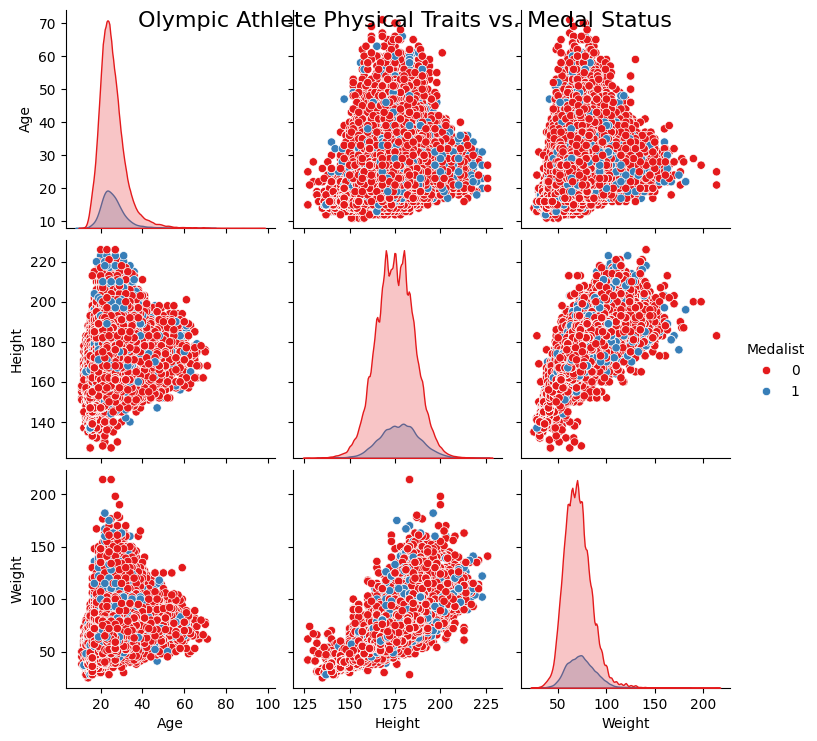

In [62]:
#Pair plot for every variable

sns.pairplot(athlete_df, hue='Medalist', palette='Set1')
plt.title("Olympic Athlete Physical Traits vs. Medal Status", fontsize=16)
plt.show()